# Introduction of the Project

1. Project Name: Titanic Survival Classification
2. Deliverable: Executable Model Script
3. Machine Learning Task: Classification
4. Target Variable: Survived - 0 (No) & 1 (Yes)
5. Input Features: See Below Data Dictionary
6. Win Condition: N/A (Best Possible Model)

In Summary:
The topic of this project is the most famous and beginner entry data science project - Titanic Project. In overall, by given all the input features to find out whether or not whether a person would have survived the titanic bu given the features.

# Data Dictionary

1. survival - Survival (0 = No; 1 = Yes)
2. pclass - Ticket Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Sex
5. age - Age in years
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 0.0 Library Imports

In [4]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

## Pickle for saving the model
import pickle

## Import Logistic Regression
from sklearn.linear_model import LogisticRegression

## Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Function for splitting training and test set
from sklearn.model_selection import train_test_split

## Function for creating model pipelines
from sklearn.pipeline import make_pipeline

## StandardScaler
from sklearn.preprocessing import StandardScaler

## GridSearchCV
from sklearn.model_selection import GridSearchCV

## Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## 1.0 Exploratory Analysis

### 1.1 Basic Informations

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data cleaning need to be done later for "Age", "Cabin" and "Embarked"

### 1.2 Distributions of Numeric Features

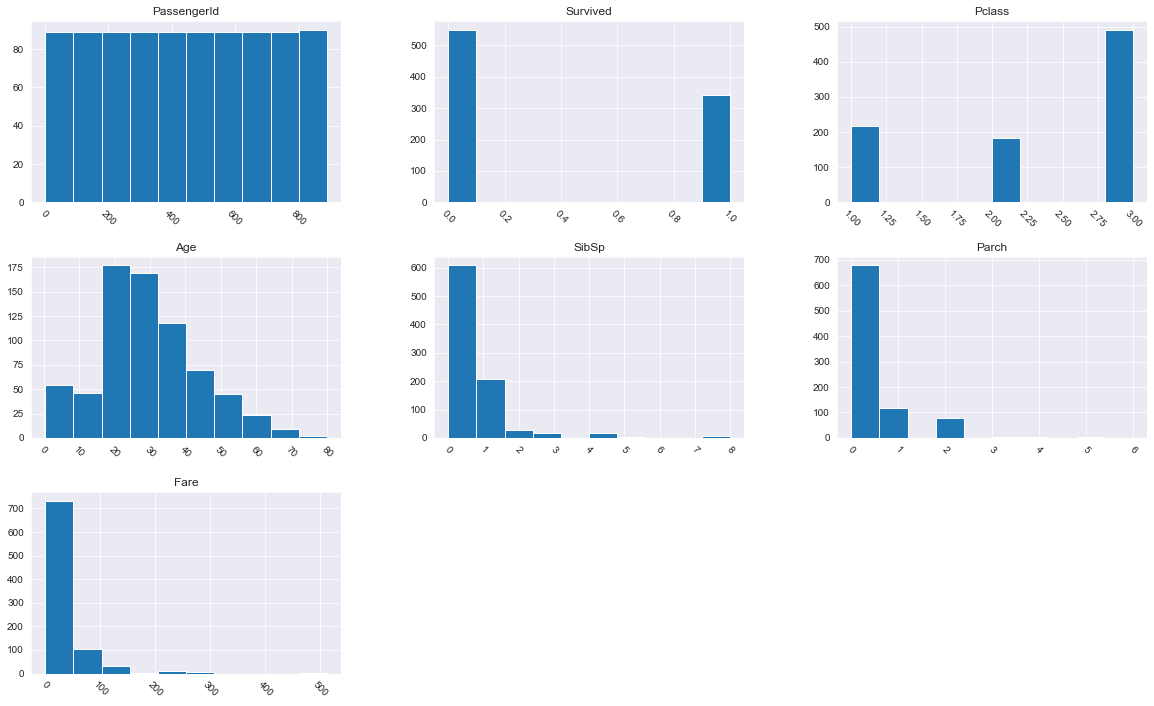

In [10]:
df.hist(figsize=(20,12), xrot=-45)

plt.show()

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check & Answer**

1. Do each of the distributions make intuitive sense to you? Yes, but there is possible outliers for **"SibSp", "Parch", and "Fare"**
2. Do you anticapte any issue or sparse data? No
3. Are they any surprising distributions you should take a closer look at? **Yes, "passengerID" won't have much contribution to the modelling**
4. Do the summary statistics confirm what you've seen from the charts? Yes

**Nothing appears out of ordinary**

### 1.3 Distributions of Categorical Features

In [12]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


"Name", "Ticket", "Cabin" may removed from this dataset

In [13]:
df.dtypes[df.dtypes == "object"].drop(["Name", "Ticket", "Cabin"])

Sex         object
Embarked    object
dtype: object

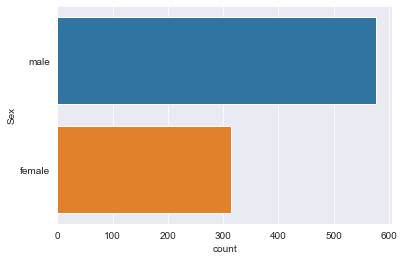

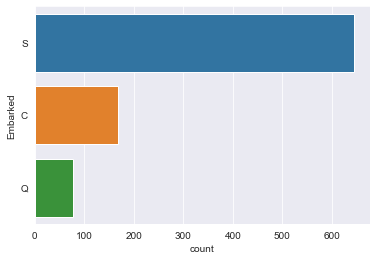

In [14]:
for feature in df.dtypes[df.dtypes == "object"].drop(["Name", "Ticket", "Cabin"]).index:
    sns.countplot(y=feature, data=df)
    plt.show()

**Check & Answer**

1. Are there any classess that might be sparse? **No**
2. Are there any classess that shouldn't be in dataset based on our project scope? **Yes, we should remove "Name", "Ticket", "Cabin".**
3. Are there any mislabeled classes? **No**
4. Are the distributions seem intuitive? **Yes**

### 1.4 Segmentations

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
## Convert target to categorical for violin plot
df["Target_categorical"] = np.where(df["Survived"] == 0, "No", "Yes")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target_categorical
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


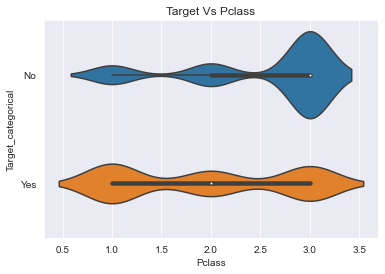

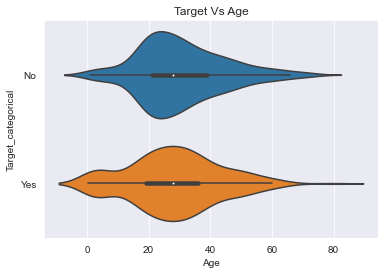

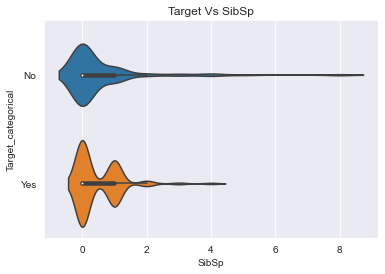

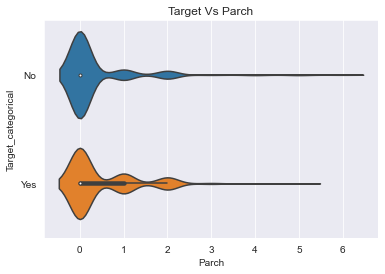

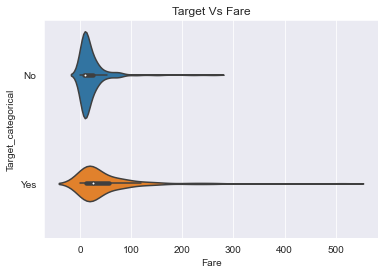

In [17]:
for feature in df.dtypes[df.dtypes != "object"].drop(["PassengerId", "Survived"]).index:
    sns.violinplot(y="Target_categorical", x=feature, data=df)
    plt.title("Target Vs {}".format(feature))
    plt.show()

In [18]:
df.groupby(["Target_categorical"]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Target_categorical,,,,,,,
No,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
Yes,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408


### 1.5 Correlations

In [19]:
correlation = df.drop(["PassengerId", "Survived"], axis=1).corr()

In [20]:
correlation

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


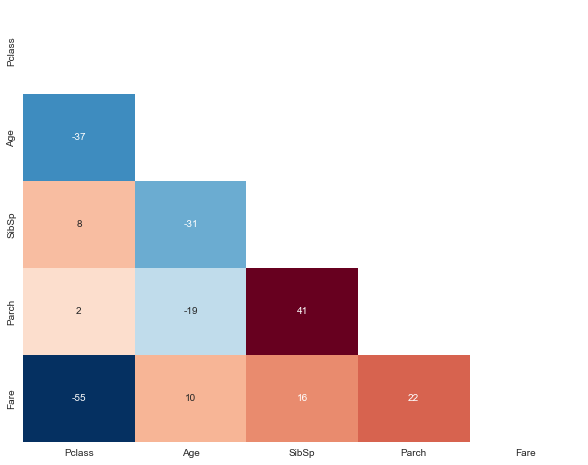

In [21]:
## White background Chart
sns.set_style("whitegrid")

## Generate a mask for the upper triangle
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = 1

plt.figure(figsize=(10,8))

sns.heatmap(correlation * 100, 
            cmap="RdBu_r", 
            annot=True, 
            fmt=".0f", 
            mask=mask,
            cbar=False
           )

plt.show()

1. Pclass and Fare -> -0.55 negative correlation
2. Pclass abd Age -> -0.37 negative correlation
3. Age and SibSp -> -0.33 negative correlation
4. Parch and Sibsp -> 0.44 positive correlation

## 2.0 Data Cleaning

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target_categorical
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


### 2.1 Drop unwanted Observations

In [24]:
## Before drop duplicates
df.shape

(891, 13)

In [25]:
df = df.drop_duplicates()

df.shape

(891, 13)

In [27]:
## PassengerId, Name, Ticket, Cabin and target_categorical wont contribute much in the modelling
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Target_categorical"], axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2.2 Fix Structural Errors

In [28]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
## Fill the Age Null Value with mean
## No point to make a person as zero age
df["Age"] = df["Age"].fillna(df["Age"].mean())

## Fill the Embarked Null value with the maximun occuring value - the missing value is only 2
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].value_counts().idxmax())

In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

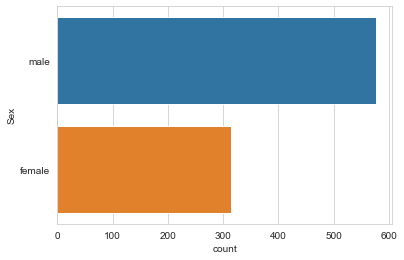

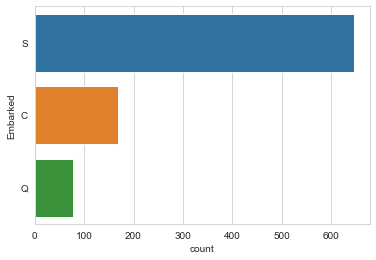

In [33]:
## Quick look on any typos or inconsistent capitalization
for feature in df.dtypes[df.dtypes == "object"].index:
    sns.countplot(y=feature, data=df)
    plt.show()

Seem likes there isn't any typos or inconsistent capization in the dataset.

### 2.3 Remove "Guilty Outlier"

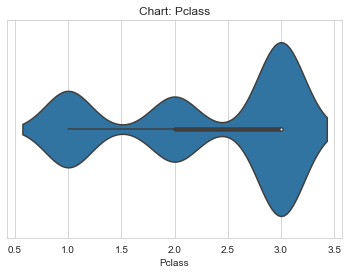

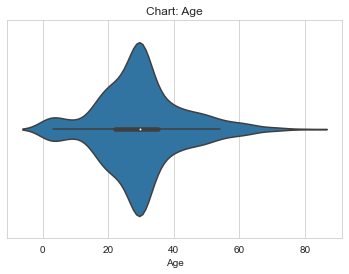

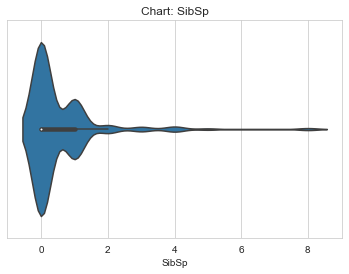

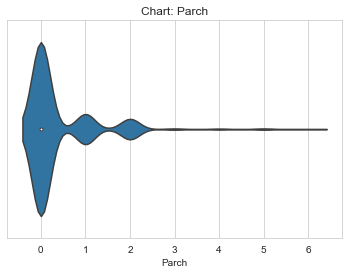

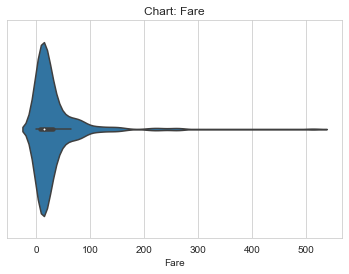

In [34]:
## 1. Do each of the distributions make intuitive sense to you? Yes, but there is possible outliers for **"SibSp", "Parch", and "Fare"**
for feature in df.dtypes[df.dtypes != "object"].drop(["Survived"]).index:
    sns.violinplot(x = feature, data=df)
    plt.title("Chart: {}".format(feature))
    plt.show()

In [35]:
# Create function to remove outliers outside columns interquartile range
def remove_outliers(dataframe, col_name):
    for col in col_name:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1      
        filtered = dataframe.query(f'(@Q1 - 1.5 * @IQR) <= {col} <= (@Q3 + 1.5 * @IQR)')
    return filtered

In [36]:
df.shape

(891, 8)

In [37]:
df = remove_outliers(df, ["SibSp", "Parch", "Fare"])

In [38]:
df.shape

(775, 8)

### 2.4 Handle Missing Data

In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing data been handled in section 2.2 Fix Structural Error

## 3.0 Feature Engineering

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q


### 3.1 Leverage Domain Knowledge

### 3.2 Create Interaction Features

### 3.3 Group Sparse Classess

### 3.4 Prepare Analytical Base Table

In [42]:
abt_df = pd.get_dummies(df, columns=["Sex", "Embarked"])

abt_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


## 4.0 Algorithm Selection

We will use three algorithms for this project. Namely:

1. Logistic Regression
2. Random Forest
3. Gradient Boosting

## 5.0 Model Training

### 5.1 Split Your Dataset

In [43]:
abt_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0


In [44]:
## Create separate object for target variable
y = abt_df["Survived"]

## Create separate object for input features
X = abt_df.drop("Survived", axis=1)

In [45]:
## Split X and y into train and test sets
## Stratified to balance the target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

print(len(X_train), len(X_test), len(y_train), len(y_test))

620 155 620 155


### 5.2 Build Model Pipelines

1. 'l1' for L1-regularized logistic regression
2. 'l2' for L2-regularized logistic regression
3. 'rf' for random forest
4. 'gb' for gradient boosted tree.

In [ ]:
## Latest update required Logistic Regression function to set solver to the "liblinear" for l1 and l2
## Function below to discover the best solver
## Resource links -> https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=123)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']

In [79]:
for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.772
  newton-cg 0.779
  lbfgs 0.781
  sag 0.774
  saga 0.772


In [87]:
pipelines = {
    "l1" : make_pipeline(StandardScaler(), LogisticRegression(penalty="l1", solver="liblinear", random_state=123)),
    "l2" : make_pipeline(StandardScaler(), LogisticRegression(penalty="l2", solver="liblinear", random_state=123)),
    "rf" : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    "gb" : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

### 5.3 Declare Hyperparamater Grids

In [89]:
### Use get_params() to find tuneable hyperparameters
pipelines["l1"].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(penalty='l1', random_state=123, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(penalty='l1', random_state=123, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_

In [90]:
## Logistic Regression hyperparameters
l1_hyperparameters = {
    "logisticregression__C" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    "logisticregression__C" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

## Random Forest hyperparameters
rf_hyperparameters = {
    "randomforestclassifier__n_estimators" : [100, 200],
    "randomforestclassifier__max_features" : ['auto', 'sqrt', 0.33],
    "randomforestclassifier__min_samples_leaf" : [1, 3, 5, 10]
}

## Gradient Boosted Tree hyperparameters
gb_hyperparameters = {
    "gradientboostingclassifier__n_estimators" : [100, 200],
    "gradientboostingclassifier__learning_rate" : [0.05, 0.1, 0.2],
    "gradientboostingclassifier__max_depth" : [1, 3, 5]
}

In [91]:
## Create hyperparameters dictionary
hyperparameters = {
    "l1" : l1_hyperparameters,
    "l2" : l2_hyperparameters,
    "rf" : rf_hyperparameters,
    "gb" : gb_hyperparameters
}

### 5.4 Fit and Tune Models with Cross Validation

In [92]:
## Create empty dictionary for fitted model
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, "has been fitted")

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


### 5.5 Cross Validated Training Performance

In [55]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.7725806451612903
l2 0.7709677419354839
rf 0.8096774193548388
gb 0.814516129032258


## 5.6 AUROC Score

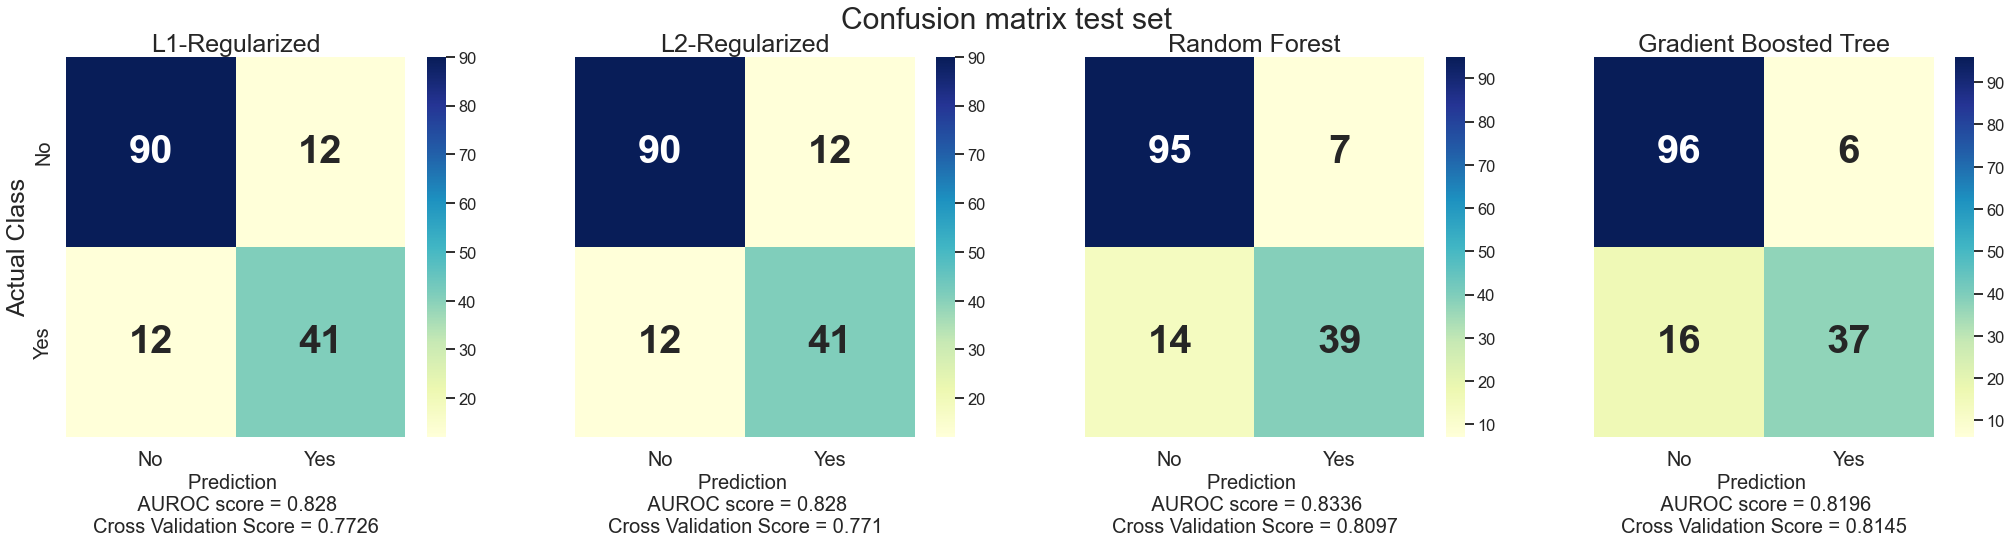

In [73]:
fig, axes = plt.subplots(1, 4, figsize=[35,7])
fig.suptitle('Confusion matrix test set \n', fontsize=30)
axes.flatten()
j=0

for name, model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    
    sns.set_context('talk')
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['No', 'Yes']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction \n AUROC score = ' + str(round(roc_auc_score(y_test, pred),4)) + "\nCross Validation Score = " + str(round(model.best_score_, 4)), fontsize=20)
    j += 1

    axes[0].set_yticklabels(labels, fontsize=20)
    axes[0].set_ylabel('Actual Class', fontsize=25)
    for index, name in enumerate(["L1-Regularized", "L2-Regularized", "Random Forest", "Gradient Boosted Tree"]):
        axes[index].set_title(name, fontsize=25)

## 6.0 Insights & Analysis

The winner is **Random Forest Tree!**

In summary, we identified the best classification model for this project is Random Forest Tree with the 0.8336 AUROC Score. However, Gradient Boosted Tree has the highest CV Score, 0.8145.